In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# load and investigate the data here:
df = pd.read_csv('tennis_stats.csv')
print(df.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

# Exploratory analysis

After an initial look at the data, I would like to explore how various factors affect the winnings of a player. I will be looking at the following factors:
1. Aces (higher number indicates a strong serve)
2. Break Points Opportunities i.e. the number of times a player has had the opportunity to break the opponent's serve  (higher number indicates a strong return)
3. Total Points Won (higher number indicates a strong overall game)

I will compare these findings with the perceived best attributes of some of the best players in the world, to see if the data supports these claims. For example:
- Marin Cilic, the highest ranking player in the dataset, is known for his strong serve
- Alexander Zverev, the second highest ranking player in the dataset, is known for his strong return

It is worth noting that there are two main types of data in the set: absolute values and percentages:
- Absolute values: Winnings, Aces, Break Points Opportunities, Double faults
- Percentages: Service Games Won, Return Games Won, Total Points Won

As I am interested in winnings (absolute), it makes sense to limit our analysis to the absolute features. For example, a player with a high percentage of service games won may not necessarily have a high number of aces.


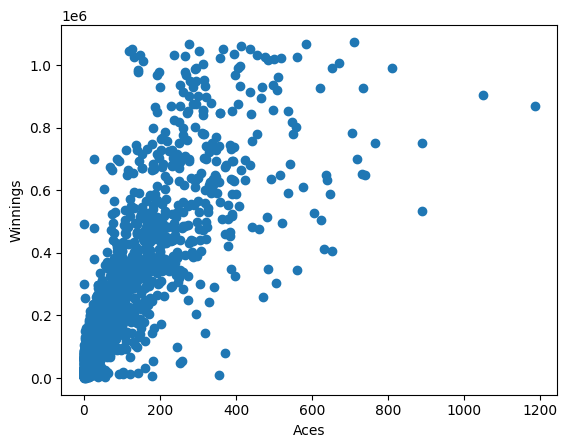

In [3]:
plt.scatter(df['Aces'], df['Winnings'])

plt.xlabel('Aces')
plt.ylabel('Winnings')

plt.show()

This graph suggests a positive correlation between the number of aces and the winnings of a player.

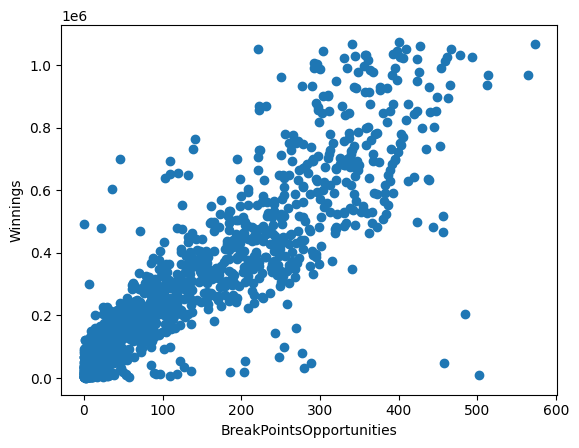

In [4]:
plt.scatter(df['BreakPointsOpportunities'], df['Winnings'])

plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')

plt.show()

This graph suggests a positive correlation between the number of break points opportunities and the winnings of a player.

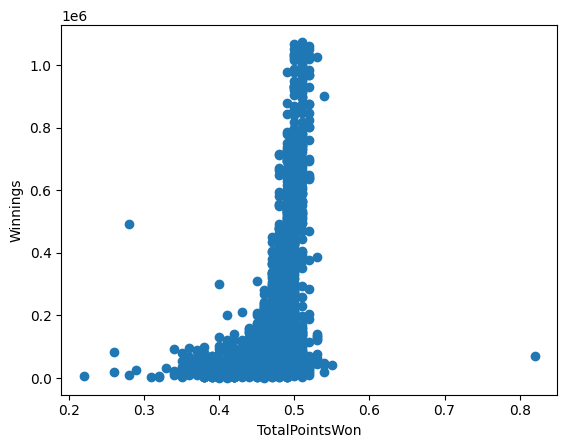

In [5]:
plt.scatter(df['TotalPointsWon'], df['Winnings'])

plt.xlabel('TotalPointsWon')
plt.ylabel('Winnings')

plt.show()

This graph suggests a strong positive correlation between the total points won and the winnings of a player.

# Single feature linear regressions


In [22]:
# Choosing features to predict winnings
features = ['Aces', 'BreakPointsOpportunities', 'TotalPointsWon']
outcomes = {}


In [23]:
# Splitting the data into training and test sets and storing results in dictionaries
for feature in features:
    outcome = 'Winnings'
    feature_train, feature_test, outcome_train, outcome_test = train_test_split(
        df[[feature]], df[outcome], train_size=0.8
    )
    outcomes[feature] = {
        'feature_train': feature_train,
        'feature_test': feature_test,
        'outcome_train': outcome_train.to_frame(),
        'outcome_test': outcome_test.to_frame(),
    }


In [24]:
# Create, train, and score the models
print('Model prediction scores when fitting with Aces, BPO, and TPW respectively:')
for feature, data in outcomes.items():
    model = LinearRegression()
    model.fit(data['feature_train'], data['outcome_train'])
    score = model.score(data['feature_test'], data['outcome_test'])
    print(f'{feature}: {score}')


Model prediction scores when fitting with Aces, BPO, and TPW respectively:
Aces: 0.5764330480341419
BreakPointsOpportunities: 0.8459972098281228
TotalPointsWon: 0.20498504366786463


The scores of each linear regression model show a large variation in the predictive power of each feature. In descending order:
- Break Points Opportunities has the highest score with 85%: **good correlation**
- Number of Aces next with 58%: **moderate correlation**
- Total Points Won with 20%: **weak correlation**

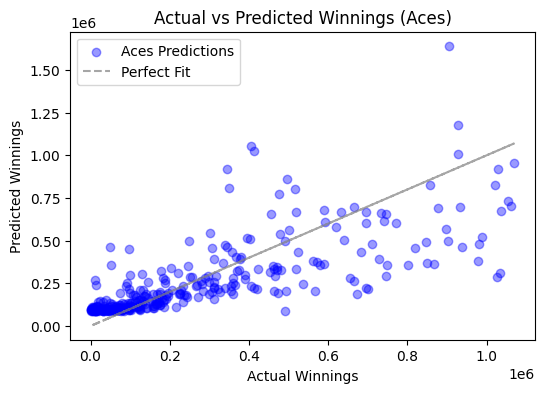

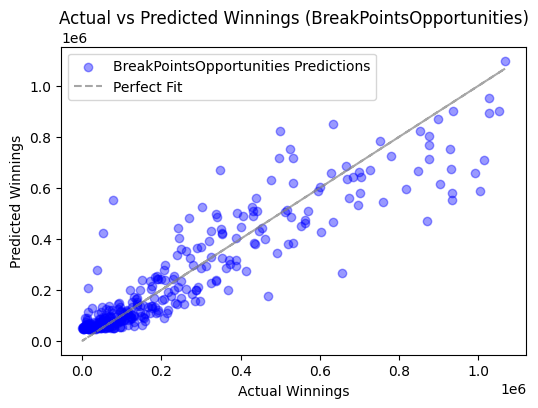

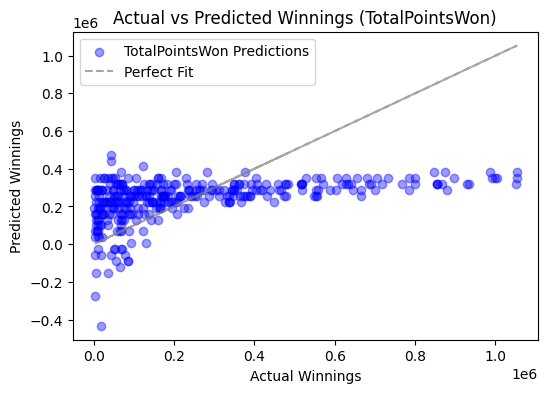

In [27]:
# Plotting Actual vs Predicted Winnings for each feature separately
for feature, data in outcomes.items():
    # Predict using the trained model
    model = LinearRegression()
    model.fit(data['feature_train'], data['outcome_train'])
    predictions = model.predict(data['feature_test'])
    
    # Plot actual vs predicted winnings
    plt.figure(figsize=(6, 4))
    plt.scatter(data['outcome_test'], predictions, alpha=0.4, color='blue', label=f'{feature} Predictions')
    plt.plot(data['outcome_test'], data['outcome_test'], color='gray', linestyle='--', alpha=0.7, label='Perfect Fit')
    
    # Set titles and labels
    plt.xlabel('Actual Winnings')
    plt.ylabel('Predicted Winnings')
    plt.title(f'Actual vs Predicted Winnings ({feature})')
    plt.legend()
    plt.show()


## Observations:
Comparing the line against the data points, we see that the model under-predicts the winnings of players for low values of each feature, and over-predicts the winnings of players for high values of each feature.


#  Two feature linear regressions


# Multiple feature linear regressions
